In [1]:
from sklearn.svm import LinearSVC
import os
import numpy as np
from sklearn.model_selection import train_test_split
from model_evalulator import Evalulator
from sklearn import preprocessing
from oversampler import Oversampler

In [2]:
filepath = os.path.abspath(os.path.join(os.getcwd(),'data'))
image_filepath = filepath + '/image_arrays.npy'
binary_label_filepath = filepath + '/binary_image_labels.npy'

data_array = np.load(image_filepath, allow_pickle = True)
binary_labels_array = np.load(binary_label_filepath, allow_pickle = True)

binary_data = {'images':data_array,'labels':binary_labels_array}

In [3]:
x_temp = binary_data['images']/255

x = np.empty(shape=[x_temp.shape[0]] + [109824], dtype='float32')
print(x_temp.shape)

for im in range(x_temp.shape[0]):
    x[im,:] = x_temp[im,:,:].flatten()

print(x.shape)
x[0,:]

(6400, 208, 176, 3)
(6400, 109824)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x, binary_data['labels'], test_size=0.25, random_state=50)

print(x_train.shape)
print(y_train.shape)

(4800, 109824)
(4800,)


In [ ]:
svc = LinearSVC(loss='hinge')
svc.fit(x_train, y_train)

In [ ]:
svc2 = LinearSVC(loss='hinge')
svc2.fit(x_train_scaled, y_train)

In [13]:
print('Test Accuracy of the SVC = ', round(svc.score(x_test, y_test), 4))

Test Accuracy of the SVC =  0.9812


In [14]:
predictions = svc.predict(x_test)

In [15]:
predictions

array([1, 1, 1, ..., 0, 0, 0])

Accuracy: 0.98125
F1: 0.98125
Recall: 0.98125
Precision: 0.98130
Jaccard: 0.96319


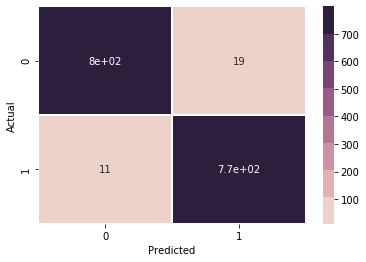

In [17]:
eval1 = Evalulator(y_test, predictions)

eval1.confusion_matrix()
eval1.stats()

# SMOTE

In [2]:
filepath = os.path.abspath(os.path.join(os.getcwd(),'data'))
image_filepath = filepath + '/image_arrays.npy'
label_filepath = filepath + '/image_labels.npy'
binary_label_filepath = filepath + '/binary_image_labels.npy'

data_array = np.load(image_filepath, allow_pickle = True)
labels_array = np.load(label_filepath, allow_pickle = True)
binary_labels_array = np.load(binary_label_filepath, allow_pickle = True)

data = {'images':data_array,'labels':labels_array}
binary_data = {'images':data_array,'labels':binary_labels_array}

In [3]:
ov = Oversampler(data['images'], data['labels'], .25)

In [4]:
artificial_images, new_image_count = ov.smote()

KeyboardInterrupt: 

In [5]:
new_image_count

{'NonDemented': 0,
 'MildDemented': 429,
 'ModerateDemented': 64,
 'VeryMildDemented': 229}

In [6]:
smalls = []
for i in ov.distances:
    if i < 2000:
        smalls.append(i)

In [9]:
sum(ov.distances) / len(ov.distances)

2171.677377872715